<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML8_professor_resolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Modelos de Regressão e Classificação em R**
---



## **Atenção**: este é um notebook R (`colab.to/r`)

# Data: Age $\times$ Height

In [34]:
download.file('https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/data/ageandheight.xlsx', destfile = "/content/ageandheight.xlsx")

In [35]:
library(readxl)
df = read_excel('/content/ageandheight.xlsx') 

print(head(df))


# A tibble: 6 × 3
    age height no_siblings
  <dbl>  <dbl>       <dbl>
1    18   76.1           1
2    19   77             2
3    20   78.1           4
4    21   78.2           5
5    22   78.8           3
6    23   79.7           2


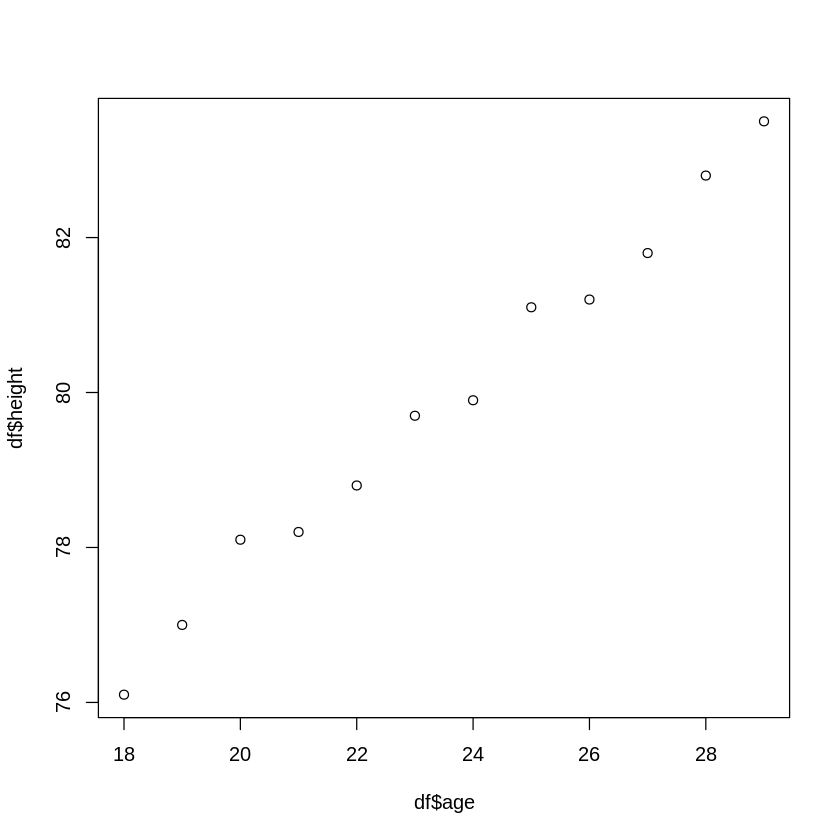

In [36]:
plot(df$age, df$height)

# Regressão Simples

In [37]:
fit = lm(height~age, data = df)  
summary(fit) 


Call:
lm(formula = height ~ age, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27238 -0.24248 -0.02762  0.16014  0.47238 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  64.9283     0.5084  127.71  < 2e-16 ***
age           0.6350     0.0214   29.66 4.43e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.256 on 10 degrees of freedom
Multiple R-squared:  0.9888,	Adjusted R-squared:  0.9876 
F-statistic:   880 on 1 and 10 DF,  p-value: 4.428e-11


In [38]:
age = c(27,28,29)
newdata = data.frame(age)

prediction = predict(fit, newdata)    
print(prediction)

       1        2        3 
82.07238 82.70734 83.34231 


# Regressão Múltipla

In [39]:
fit = lm(height ~ age + no_siblings, data = df)  
summary(fit) 

age = c(27,28,29)
no_siblings = c(1,2,2)
newdata = data.frame(age, no_siblings )

prediction = predict(fit, newdata)    
print(prediction)


Call:
lm(formula = height ~ age + no_siblings, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.2745 -0.2379 -0.0348  0.1676  0.4597 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 64.87033    0.65120  99.617 5.25e-15 ***
age          0.63631    0.02411  26.392 7.78e-10 ***
no_siblings  0.01096    0.07010   0.156    0.879    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2694 on 9 degrees of freedom
Multiple R-squared:  0.9888,	Adjusted R-squared:  0.9863 
F-statistic: 397.1 on 2 and 9 DF,  p-value: 1.669e-09


       1        2        3 
82.06155 82.70881 83.34512 


# Classificação

## Data: `Default`

In [40]:
install.packages('ISLR')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [41]:
library(ISLR)

In [42]:
head(Default)
df = Default
head(df)

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
2,No,Yes,817.1804,12106.135
3,No,No,1073.5492,31767.139
4,No,No,529.2506,35704.494
5,No,No,785.6559,38463.496
6,No,Yes,919.5885,7491.559


,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
2,No,Yes,817.1804,12106.135
3,No,No,1073.5492,31767.139
4,No,No,529.2506,35704.494
5,No,No,785.6559,38463.496
6,No,Yes,919.5885,7491.559


## Decision Tree

In [43]:
install.packages('rpart.plot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



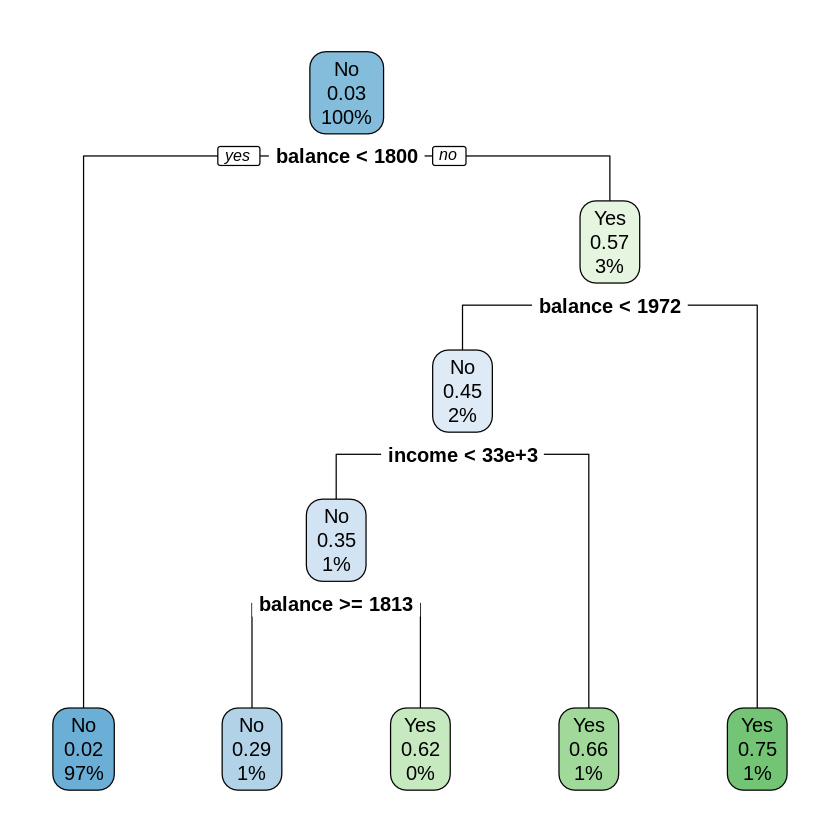

In [44]:
library(rpart)
library(rpart.plot)

set.seed(123)

L = sample(1:nrow(df),round(0.3*nrow(df)))  

test = df[L,]
train = df[-L,]

fit = rpart(default ~  .,data=train)

rpart.plot(fit, extra = 106)


In [45]:
pred = predict(fit,test,type = "class")
# print(pred)

cm = table(test$default, pred)
cat('\n\n Matriz de Confusão: \n')
print(cm)

cat('\n\n Acuracidade: ', sum(diag(cm))/sum(cm))



 Matriz de Confusão: 
     pred
        No  Yes
  No  2877   19
  Yes   65   39


 Acuracidade:  0.972

In [46]:
student = c( 'Yes', 'No' )
balance = c( mean(df$balance), mean(df$balance))
income = c( mean(df$income), mean(df$income))

newdata = data.frame(student, balance, income)

prediction = predict(fit, newdata, type = "class")   
print(prediction)



 1  2 
No No 
Levels: No Yes


## Naive Bayes

In [47]:
install.packages('naivebayes')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




================================== Naive Bayes ================================== 
 
- Call: naive_bayes.formula(formula = default ~ ., data = train, usekernel = T) 
- Laplace: 0 
- Classes: 2 
- Samples: 7000 
- Features: 3 
- Conditional distributions: 
    - Bernoulli: 1
    - KDE: 2
- Prior probabilities: 
    - No: 0.9673
    - Yes: 0.0327

--------------------------------------------------------------------------------- 


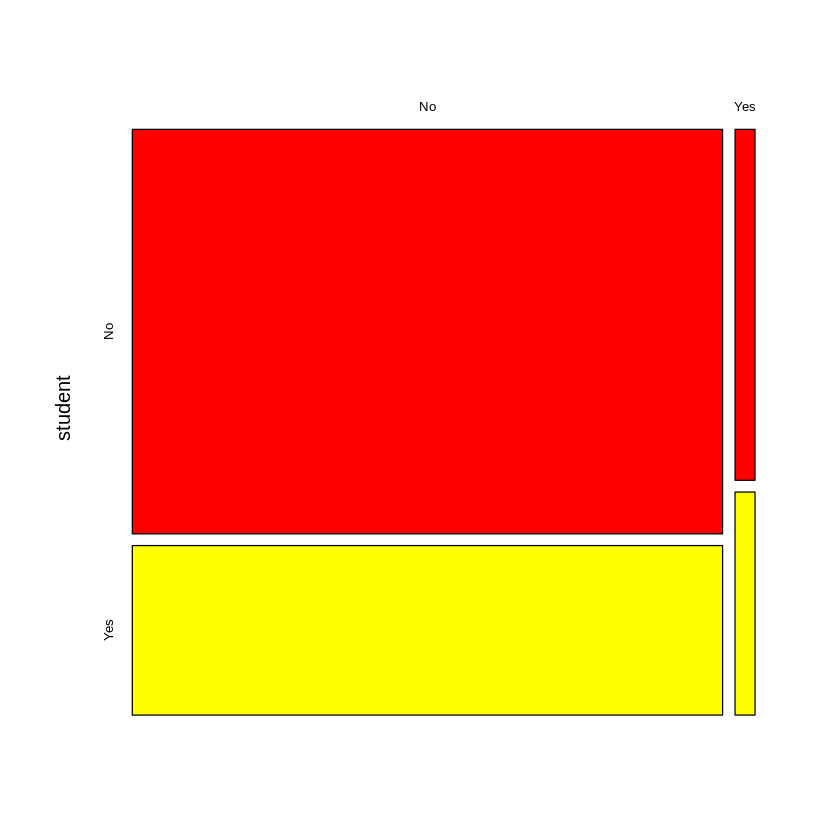

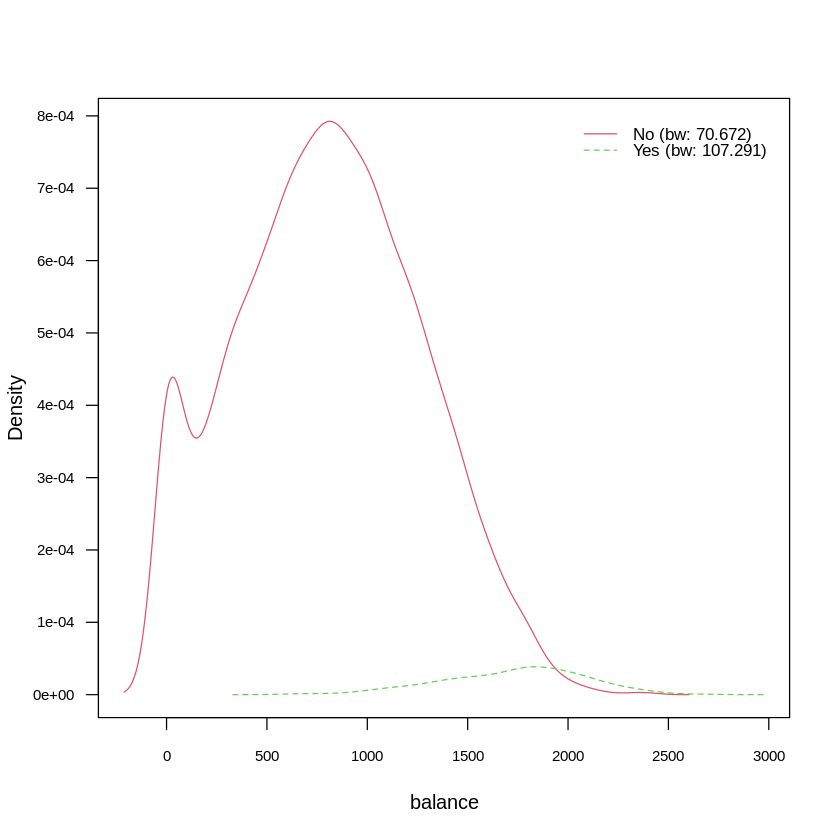

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”




 Matriz de Confusão: 
     pred
        No  Yes
  No  2879   17
  Yes   69   35


 Acuracidade:  0.9713333

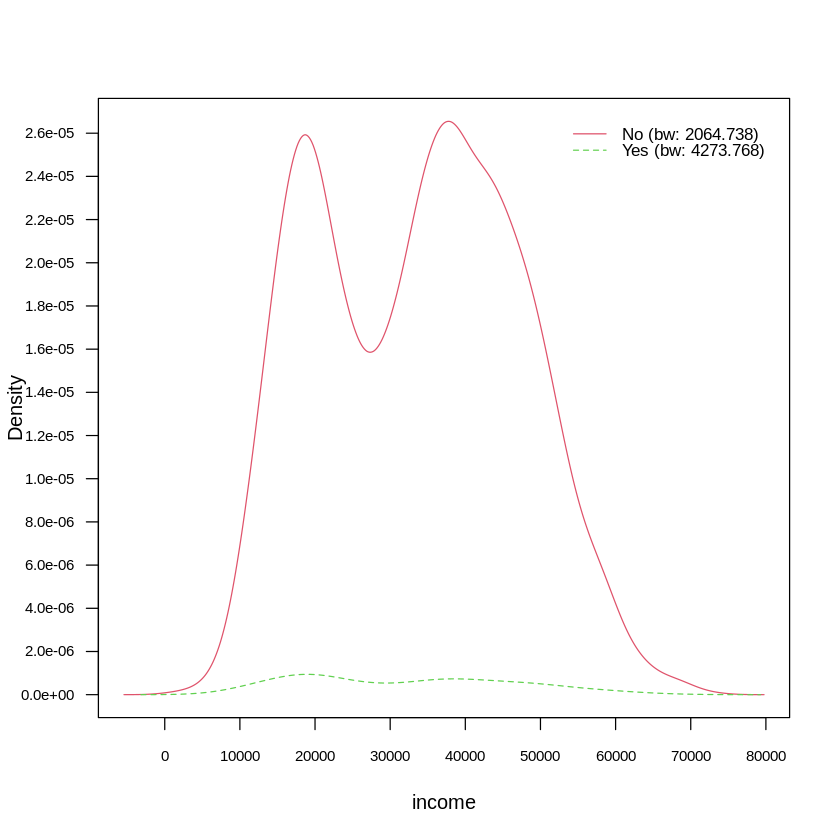

In [48]:
library(naivebayes)
set.seed(123)

L = sample(1:nrow(df),round(0.3*nrow(df)))  

test = df[L,]
train = df[-L,]

fit = naive_bayes(default ~ ., data = train, usekernel = T) 

summary(fit)
plot(fit)

pred = predict(fit,test,type = "class")
# print(pred)

cm = table(test$default, pred)
cat('\n\n Matriz de Confusão: \n')
print(cm)

cat('\n\n Acuracidade: ', sum(diag(cm))/sum(cm))

In [49]:
prediction = predict(fit, newdata, type = "class")   
print(prediction)

[1] No No
Levels: No Yes


## SVM

* Atenção: **R will typically generate dummy variables automatically**

In [51]:
install.packages('e1071')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [53]:
library(e1071)

In [56]:
set.seed(123)

L = sample(1:nrow(df),round(0.3*nrow(df)))  

test = df[L,]
train = df[-L,]

fit = svm(default ~ .,data=train, kernel = "radial")

summary(fit)

pred = predict(fit,test,type = "class")
# print(pred)

cm = table(test$default, pred)
cat('\n\n Matriz de Confusão: \n')
print(cm)

cat('\n\n Acuracidade: ', sum(diag(cm))/sum(cm))


Call:
svm(formula = default ~ ., data = train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  469

 ( 247 222 )


Number of Classes:  2 

Levels: 
 No Yes






 Matriz de Confusão: 
     pred
        No  Yes
  No  2893    3
  Yes   80   24


 Acuracidade:  0.9723333